In [1]:
import matplotlib.pyplot as plt
import sncosmo,os,sys,math,glob
import numpy as np
from scipy.interpolate import interp1d
sed_directory=os.path.join('SNANA','snsed','non1a')

In [2]:
def findSNType(filename):
    for typ in ['Ib','Ic','II']:
        files=glob.glob(os.path.join(sed_directory,'Type_'+typ,'*.SED'))
        for f in files:
            if filename in f:
                return(typ)

In [3]:
def plotBoxLC(sed=None,boxStart=9200,boxWidth=200,snType='Ib',phaseRange=(-15,50)):
    if isinstance(sed,str):
        title=sed
        snType=findSNType(sed)
    elif isinstance(sed,(tuple,list)) and len(sed)==1:
        title=sed[0]
        snType=findSNType(sed[0])
    elif isinstance(sed,(tuple,list)) and len(sed)>1:
        snType=findSNType(sed[0])
        title='Type '+snType
    else:
        title='Type '+snType
    wave=[boxStart,boxStart+boxWidth] 
    transmission=[1,1]
    sncosmo.registry.register(sncosmo.Bandpass(wave,transmission,name='windowFilter'),force=True)
    if not sed:
        sedList=glob.glob(os.path.join(sed_directory,'Type_'+snType,'*.SED'))
    else:
        sedList=[sed] if not isinstance(sed,(tuple,list)) else sed
    sedList=[os.path.basename(x) for x in sedList]
    
        
    
    if len(sedList)==1:
        fig,ax=plt.subplots(nrows=1,ncols=2,sharex=True,sharey=False,figsize=(10,5))
        if not sedList[0].endswith('.SED'):
            sedList[0]+='.SED'
        for j in range(2):
            if j==1:
                phase,wave,flux=sncosmo.read_griddata_ascii(os.path.join(sed_directory,'Type_'+snType,os.path.basename(sedList[0])))
            else:
                phase,wave,flux=sncosmo.read_griddata_ascii(os.path.join(old_sed_directory,sedList[0]))
                
            source=sncosmo.TimeSeriesSource(phase,wave,flux)
            mod=sncosmo.Model(source)
            mod.set(z=.02)
            try:
                ax[j].plot(np.arange(phaseRange[0],phaseRange[1],.5),
                              mod.bandflux('windowFilter',np.arange(phaseRange[0],phaseRange[1],.5)))
            except:
                ax[j].annotate('Original Template Did Not Cover This Range',size=14,xy=(.15,.5), xycoords='axes fraction')
            ax[j].annotate(os.path.basename(sedList[0])[:-4],size=14,xy=(.6,.85), xycoords='axes fraction')

        ax[0].set_title('Original SNANA SEDs',fontsize=16)
        ax[1].set_title('Pierel 2018 SEDs',fontsize=16)
    else:
        fig,ax=plt.subplots(nrows=len(sedList),ncols=2,sharex=True,sharey=False,
                            figsize=(max(2*len(sedList),10),max(2.5*len(sedList),10)))
        for i in range(len(sedList)):
            if not sedList[i].endswith('.SED'):
                sedList[i]+='.SED'
            for j in range(2):
                if j==1:
                    phase,wave,flux=sncosmo.read_griddata_ascii(os.path.join(sed_directory,'Type_'+snType,os.path.basename(sedList[i])))
                else:
                    phase,wave,flux=sncosmo.read_griddata_ascii(os.path.join(old_sed_directory,sedList[i]))

                source=sncosmo.TimeSeriesSource(phase,wave,flux)
                mod=sncosmo.Model(source)
                mod.set(z=.02)
                try:
                    ax[i][j].plot(np.arange(phaseRange[0],phaseRange[1],.5),
                                  mod.bandflux('windowFilter',np.arange(phaseRange[0],phaseRange[1],.5)))
                except:
                    ax[i][j].annotate('Original Template Did Not Cover This Range',size=14,xy=(.15,.5), xycoords='axes fraction')
                ax[i][j].annotate(os.path.basename(sedList[i])[:-4],size=14,xy=(.6,.85), xycoords='axes fraction')

        ax[0].set_title('Original SNANA SEDs',fontsize=16)
    plt.suptitle('Y Band Comparison--'+title,fontsize=22)
    plt.show()
    plt.close()
        
        

NameError: name 'old_sed_directory' is not defined

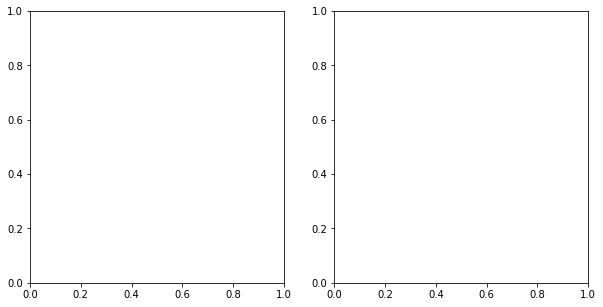

In [4]:
plotBoxLC(['SDSS-019323'],snType='Ic',boxStart=9200,boxWidth=200)